### Import the relevant libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd



%matplotlib inline


sns.set()

### Load the raw data

In [2]:
from sklearn.datasets import load_boston

data_raw = load_boston()

In [3]:
print(data_raw.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(data_raw.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data = pd.DataFrame(data_raw.data, columns=data_raw.feature_names)
data['price'] = data_raw.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [7]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

### Preprocessing

#### Explore describtive statistic of variables

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Handle missing values

No missing values in dataset

#### EDA

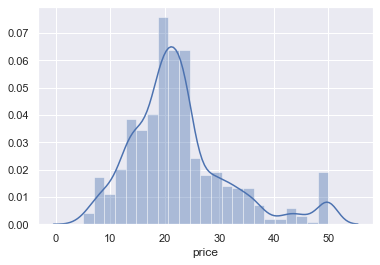

In [9]:
sns.distplot(data['price'])

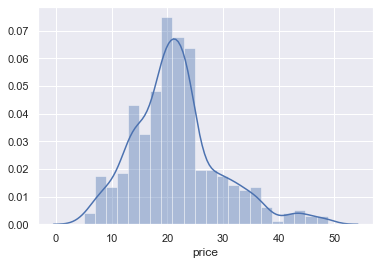

In [10]:
q = data['price'].quantile(0.99)
data = data[data['price'] < q]
sns.distplot(data['price'])

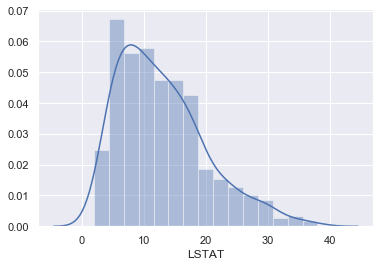

In [11]:
sns.distplot(data['LSTAT'])

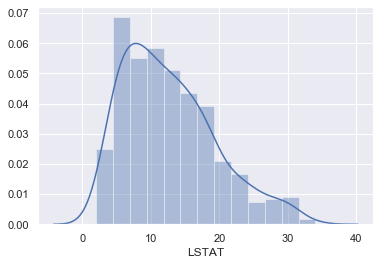

In [12]:
q = data['LSTAT'].quantile(0.99)
data = data[data['LSTAT'] < q]
sns.distplot(data['LSTAT'])

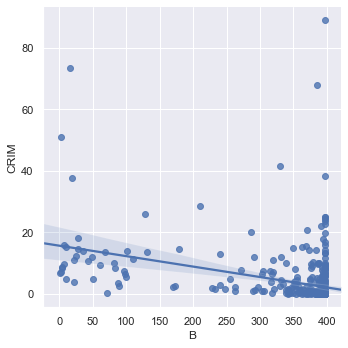

In [13]:
sns.lmplot(x='B',y='CRIM', data=data)

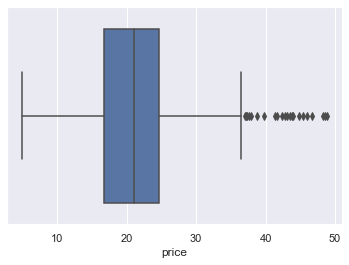

In [14]:
sns.boxplot(data['price'])

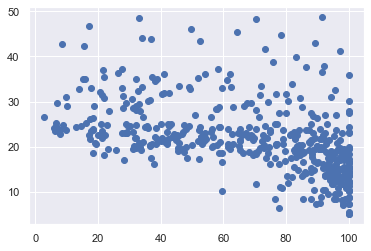

In [15]:
plt.scatter(data['AGE'],data['price'])

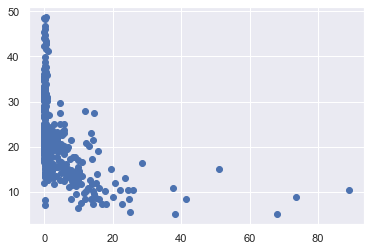

In [16]:
plt.scatter(data['CRIM'], data['price'])

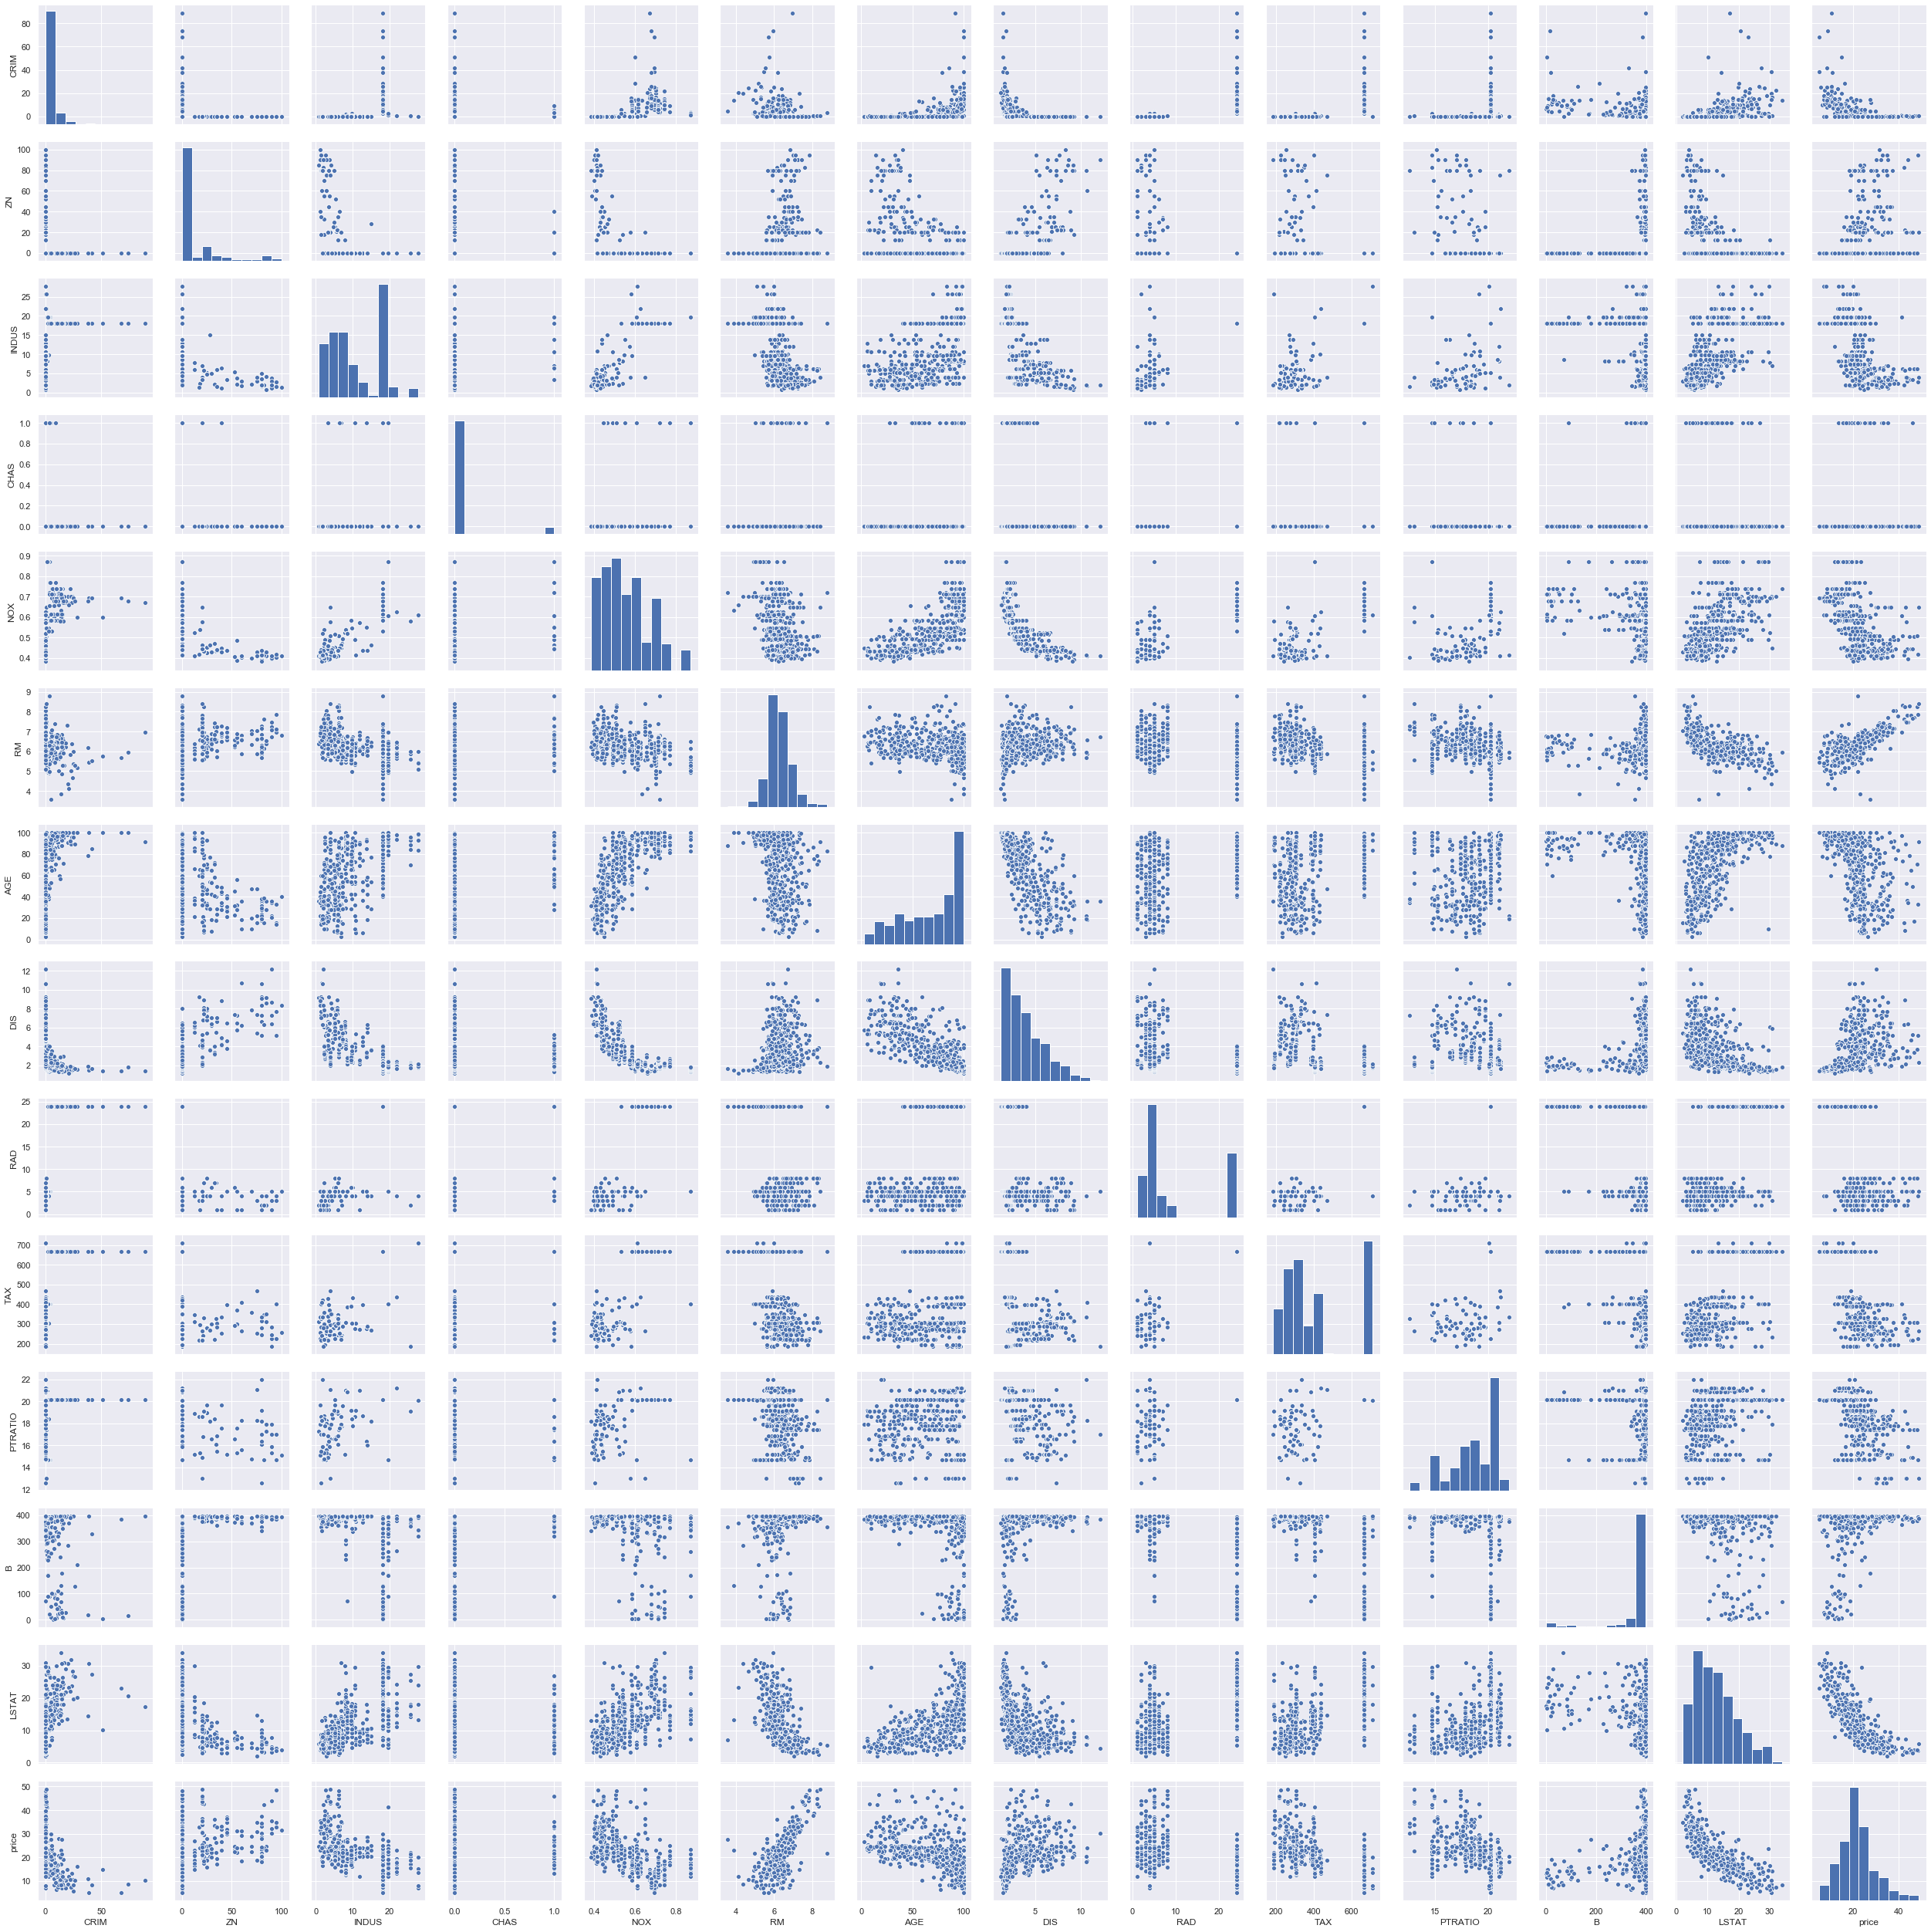

In [17]:
sns.pairplot(data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

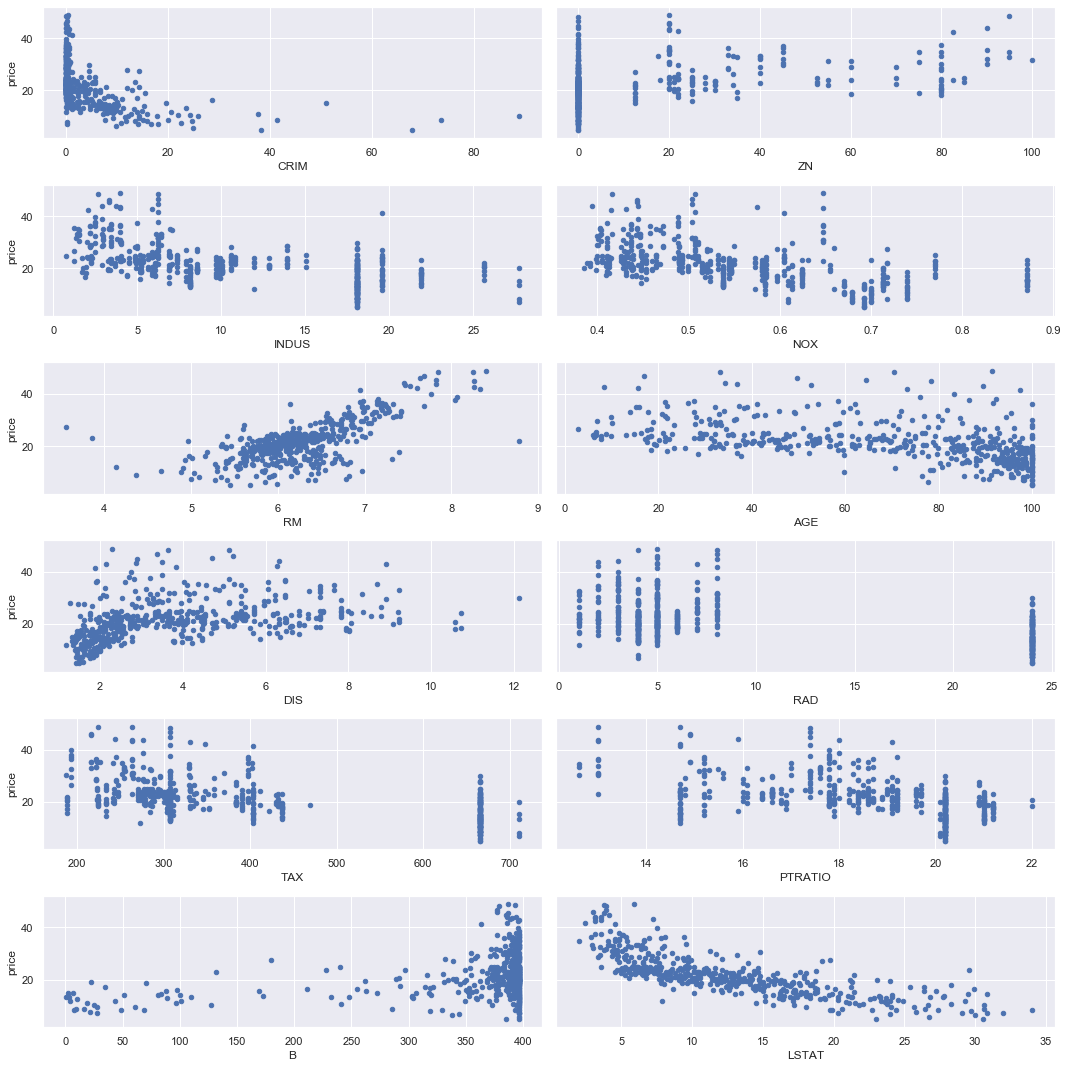

In [18]:
numeric_cols = [ 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

fig, axes = plt.subplots(6, 2, figsize=(15,15), sharey=True)

for col, ax in zip(numeric_cols, axes.flatten()):
    data.plot(x=col, y = 'price', kind='scatter', ax=ax)

fig.tight_layout()

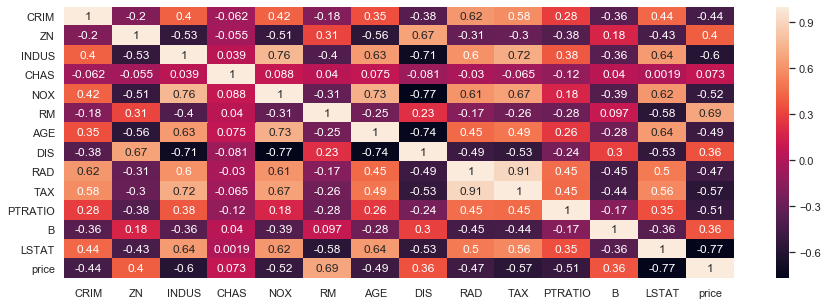

In [19]:
plt.figure(figsize=(15,5))

sns.heatmap(data.corr(), annot=True)

IndexError: index 8 is out of bounds for axis 0 with size 8

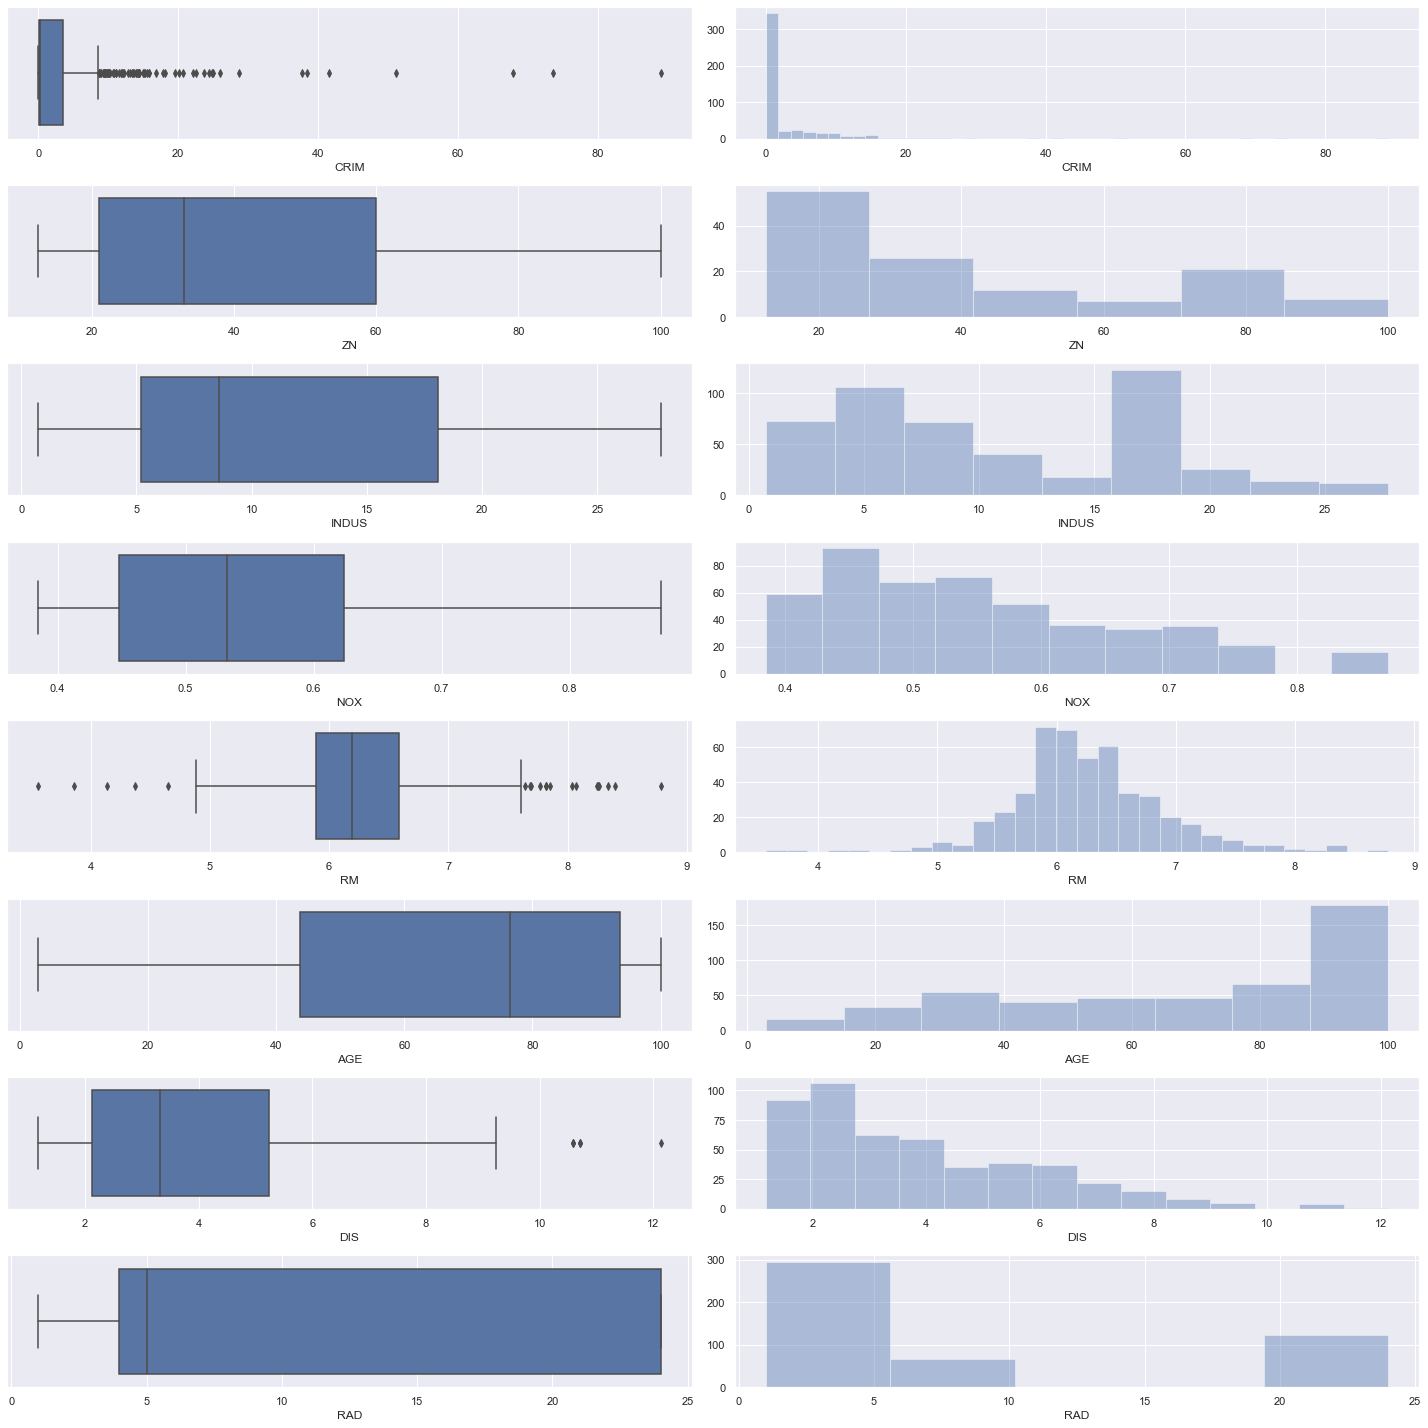

In [20]:
fig, axes = plt.subplots(8,2, figsize=(20,20))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data[col].replace(0, pd.np.nan).dropna(), ax=axes[i,0])
    sns.distplot(data[col].replace(0, pd.np.nan).dropna(), kde=False, ax=axes[i,1])
    
    
    fig.tight_layout()

Price and RM are positively correlated

Price and LSTAT are negatively correlated

There is no sign of outliers in the data, some few houses priced above 50 have 7 rooms pluse 

Both LSTAT and RM are highly corrrrelated so we drop one of them as features

### Checking OLS assumptions

#### --------- Relaxing the assumptions

#### Linearity

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data['LSTAT'],data['price'])
ax1.set_title('Price and LSTAT')
ax2.scatter(data['RM'],data['price'])
ax2.set_title('Price and RM')
ax3.scatter(data['AGE'],data['price'])
ax3.set_title('Price and AGE')

 ----------------------------------------Dataset pass the normality test--------------------------------------------

#### No Endogeneity

#### Normality & Homoscedasticity

normality is assumped for a big sample following the central limit theorm
the zero mean of the distribution of errors is accomplished to the inclusion of the intercept in the regression

#### No Autocorrelation

The observation in the dataset are not coming from time series data or panel data 
They do not depend on each other

#### No Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['feature'] = variables.columns

In [ ]:
vif

In [ ]:
vifs=vif[vif['VIF'] < 11]
vifs

In [ ]:
import statsmodels.api as sm

target2 = data['price']
inputs2 = data.drop(['price','NOX','CHAS','INDUS'],axis=1)

x = sm.add_constant(inputs2)
results = sm.OLS(target2,inputs2).fit()

results.summary()

VIF greater than 10 are highly correlated with the other variables

### Linear regression model

#### Declare the inputs and target

In [21]:
target = data['price']
inputs = data.drop(['price','NOX','CHAS','INDUS'],axis=1) 

#### Scale the data

Standardize the features 

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
inputs = scaler.transform(inputs)

#### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=101)

#### Training the Model

#### create the regression

In [25]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Checking the Model

Plot predicted values of the model against the targets

In [26]:
predictions = reg.predict(x_train)

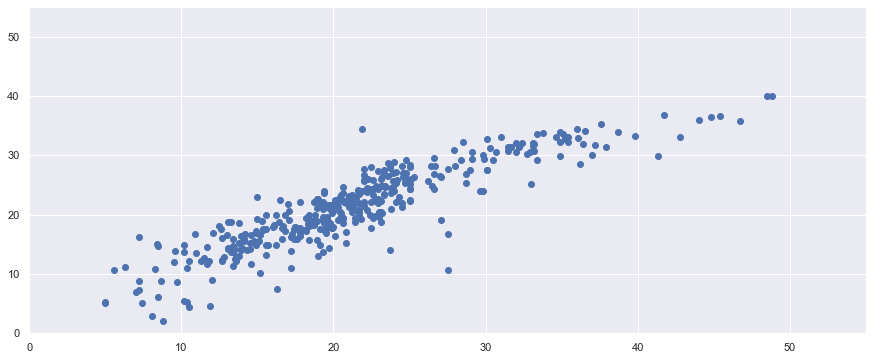

In [27]:
plt.figure(figsize=(15,6))
plt.scatter(y_train,predictions)
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

The residual plot to check the model

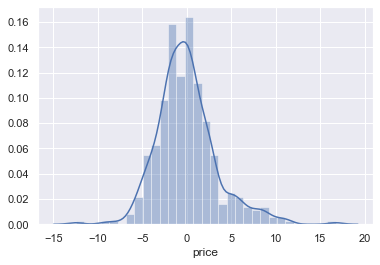

In [28]:
sns.distplot(y_train - predictions)

The model turns to overestimate the target since there is a longer tail on the positive side(right). a much higher 

price is predicted than is observed. On the left it is observeed that the model rarely underestimate the target 

#### Calcuting the R squred

In [29]:
np.round(reg.score(x_train,y_train),2)

0.81

In [30]:
from sklearn import metrics

metrics.explained_variance_score(y_train,predictions)

0.8056067719569591

#### Finding the weights and bias

In [31]:
reg.intercept_

21.495758556593664

In [32]:
reg.coef_

array([-1.11419464,  0.80781119,  2.77860583, -1.02606188, -1.85192154,
        1.90128145, -2.55124199, -1.39218314,  0.89874832, -2.71585362])

In [33]:
#reg_summary = pd.DataFrame(data.drop(['price'],axis=1).columns.values, columns=['Features'])
#reg_summary['weights'] = reg.coef_
#reg_summary

A postive weight shows that as a feature increases in value, so do the price. e.g. RM

A negative weight shows that as a feature increases in value, price decreases e.g. CRIM

### Testing

In [34]:
predictions_test = reg.predict(x_test)

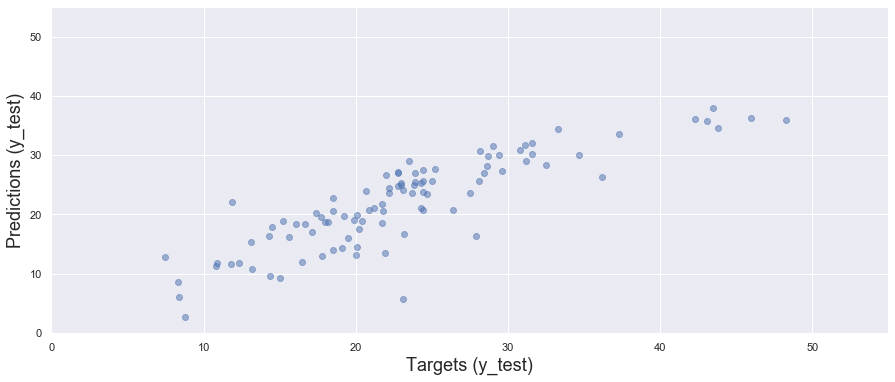

In [35]:
plt.figure(figsize=(15,6))
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_test)',size=18)
plt.scatter(y_test,predictions_test, alpha=0.5)
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

#### Evaluating the Model

Checking the performance of the model

In [67]:
performance = pd.DataFrame(predictions_test, columns=['Prediction'])
performance.head()

,Prediction
0,25.28
1,20.62
2,35.76
3,17.82
4,23.65


In [68]:
performance['Targets'] = y_test
performance.head()

,Prediction,Targets
0,25.28,24.30
1,20.62,18.50
2,35.76,43.10
3,17.82,14.50
4,23.65,22.20


In [69]:
y_test = y_test.reset_index(drop=True)
y_test

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [70]:
performance['Targets'] = y_test
performance

,Prediction,Targets
0,25.28,24.30
1,20.62,18.50
2,35.76,43.10
3,17.82,14.50
4,23.65,22.20
5,16.78,23.20
6,18.91,20.40
7,12.89,7.50
8,14.42,19.10
9,17.52,20.20


In [71]:
performance['Residual'] = performance['Targets'] - performance['Prediction']

In [72]:
performance['Difference%'] = np.absolute(performance['Residual']/performance['Targets'] *100)

In [73]:
performance

,Prediction,Targets,Residual,Difference%
0,25.28,24.30,-0.98,4.04
1,20.62,18.50,-2.12,11.48
2,35.76,43.10,7.34,17.02
3,17.82,14.50,-3.32,22.91
4,23.65,22.20,-1.45,6.51
5,16.78,23.20,6.42,27.67
6,18.91,20.40,1.49,7.31
7,12.89,7.50,-5.39,71.87
8,14.42,19.10,4.68,24.51
9,17.52,20.20,2.68,13.25


In [74]:
performance.describe()

,Prediction,Targets,Residual,Difference%
count,97.00,97.00,97.00,97.00
mean,22.01,23.14,1.13,15.17
std,7.66,8.41,4.33,15.97
min,2.76,7.50,-10.22,0.06
25%,16.78,18.00,-1.94,4.37
50%,22.12,22.80,0.05,10.94
75%,27.19,27.90,3.80,21.30
max,37.92,48.30,17.29,85.91


In [75]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
performance.sort_values(by=['Difference%'])

,Prediction,Targets,Residual,Difference%
29,30.82,30.80,-0.02,0.06
75,17.07,17.10,0.03,0.15
41,21.15,21.20,0.05,0.23
59,23.64,23.70,0.06,0.26
16,21.77,21.70,-0.07,0.34
85,20.73,20.90,0.17,0.82
48,19.86,20.10,0.24,1.18
95,32.03,31.60,-0.43,1.35
64,11.63,11.80,0.17,1.46
54,28.09,28.60,0.51,1.78


In [76]:
print('MAE', metrics.mean_absolute_error(y_test,predictions_test))
print('MSE', metrics.mean_squared_error(y_test,predictions_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions_test)))

MAE 3.2301463493483844
MSE 19.84361804005315
RMSE 4.454617608735137


In [77]:
metrics.explained_variance_score(y_test,predictions_test)

0.7349005347341944

ValueError: color kwarg must have one color per data set. 97 data sets and 1 colors were provided

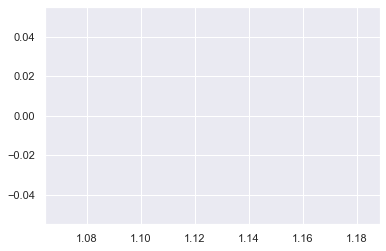

In [78]:
sns.distplot(y_test-predictions_test)

#### Create the coeffients table to answer the questions

In [79]:
#Question = pd.DataFrame(reg.coef_,data.drop(['price'],axis=1).columns.values)
#Question

### Polynomial Regression

In [80]:
x1 = data.iloc[:, 0:13].values
y1 = data.iloc[:, -1].values

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((388, 13), (97, 13), (388,), (97,))

In [82]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [83]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((388, 13), (97, 13), (388, 1), (97, 1))

In [84]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  poly_features = PolynomialFeatures(degree=degree)
  
  # transform the features to higher degree features.
  x_train_poly = poly_features.fit_transform(x_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(poly_features, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(x_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted))
  r2_train = reg.score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
  r2_test = reg.score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [85]:
create_polynomial_regression_model(2)

ValueError: Expected 2D array, got scalar array instead:
array=PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C').
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.